In [359]:
#Importing libraries.

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [360]:
#Importing train and test data.

train_data = pd.read_csv('SpaceTitanic_Data/spacetitanic_train.csv')
test_data = pd.read_csv('SpaceTitanic_Data/spacetitanic_test.csv')

In [361]:
#Understanding the data.

test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [362]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [363]:
#Call our train data X to make it easier to work with.
X = train_data 

In [364]:
X.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [365]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


<AxesSubplot:>

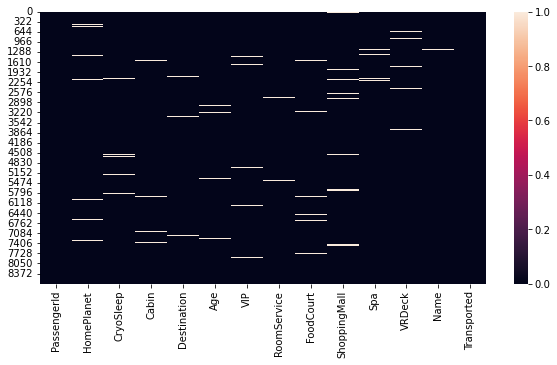

In [366]:
#Understanding the missing values in our dataset X.
ax , fig = plt.subplots(figsize = (10,5))
sns.heatmap(X.isnull() )

We want to understand the behaviour of the missing data in each column of our dataset.

In [367]:
#We want to fill in the missing values
# in the HomePlanet column. First we see what occurs the most.
X['HomePlanet'].value_counts(dropna=False)

Earth     4602
Europa    2131
Mars      1759
NaN        201
Name: HomePlanet, dtype: int64

In [368]:
#We want to look at the missing values in the Desitnation column.
#We will look at home planets with respect to each destination.
X['Destination'].unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object)

In [369]:
X[X['Destination'] == 'TRAPPIST-1e']['HomePlanet'].value_counts(dropna=False)

Earth     3101
Mars      1475
Europa    1189
NaN        150
Name: HomePlanet, dtype: int64

In [370]:
X[X['Destination'] == 'PSO J318.5-22']['HomePlanet'].value_counts(dropna=False)

Earth     712
Mars       49
Europa     19
NaN        16
Name: HomePlanet, dtype: int64

In [371]:
X[X['Destination'] == '55 Cancri e']['HomePlanet'].value_counts(dropna=False)

Europa    886
Earth     690
Mars      193
NaN        31
Name: HomePlanet, dtype: int64

In [372]:
X[X['Destination'].isnull()]['HomePlanet'].value_counts(dropna=False)

Earth     99
Mars      42
Europa    37
NaN        4
Name: HomePlanet, dtype: int64

In [373]:
#We are creating a table to see where people are coming from and where people are going.
travel_data_path ='SpaceTitanic_Data/SpaceTitanic_TravelMatrix.csv'
travel_data = pd.read_csv(travel_data_path)

In [374]:
travel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   from           4 non-null      object
 1   TRAPPIST-1e    4 non-null      int64 
 2   PSO J318.5-22  4 non-null      int64 
 3   55 Cancri e    4 non-null      int64 
 4   Unknown        4 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 288.0+ bytes


In [375]:
travel_data

,from,TRAPPIST-1e,PSO J318.5-22,55 Cancri e,Unknown
0,Earth,3101,712,886,99
1,Europa,1475,49,690,42
2,Mars,1189,19,193,37
3,Unknown,150,16,31,4


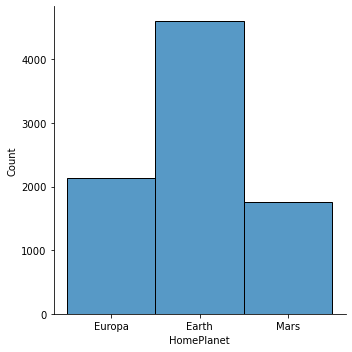

In [376]:
#We want to see wher4e most people are coming from.
sns.displot(X, x = 'HomePlanet')

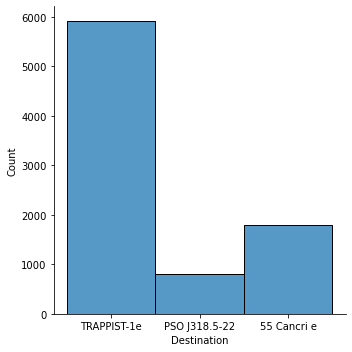

In [377]:
#we want to see where most people are going.
sns.displot(X, x = 'Destination')

In [378]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [379]:
#We are filling the the missing values in HomePlanet and Destination with the most common value from each column.

X['HomePlanet'] = X['HomePlanet'].fillna(value = 'Earth')
X['Destination'] = X['Destination'].fillna(value = 'TRAPPIST-1e')


#HomePlanet and Destination missing values filled.


In [380]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8693 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [381]:
#We are now going to analyze the CryoSleep column.
X['CryoSleep'].unique()

array([False, True, nan], dtype=object)

In [382]:
X['CryoSleep'].value_counts(dropna = False)

False    5439
True     3037
NaN       217
Name: CryoSleep, dtype: int64

In [383]:
X['CryoSleep'] = X['CryoSleep'].apply(lambda x : 1 if x else 0)

In [384]:
X['Transported'] = X['Transported'].apply(lambda x : 1 if x else 0)




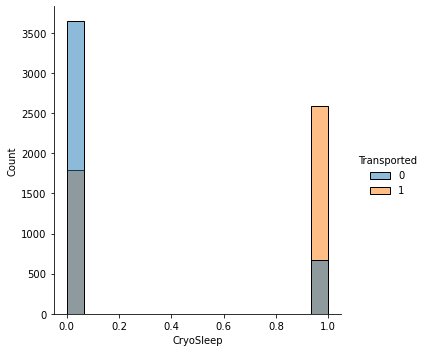

In [385]:
#We ant to see how given a transorted value, how likely it would be to have been in cryosleep.
sns.displot(X, x = 'CryoSleep', hue = 'Transported')

In [386]:
#We fill in missing values with the most likely case for transported people:
#  given not transported, we fill missing values with 0 = not in cryosleep.
X[X['Transported'] == 0]['CryoSleep']= X[X['Transported'] == 0]['CryoSleep'].fillna(value = 0 )

/Users/Eric/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [387]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8693 non-null   int64  
 3   Cabin         8494 non-null   object 
 4   Destination   8693 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   int64  
dtypes: float64(6), int64(2), object(6)
memory usage: 950.9+ KB


In [388]:
#We are going to ingnore the cabin feature.
X = X.drop(['Cabin'],axis = 1)

In [389]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8693 non-null   int64  
 3   Destination   8693 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Name          8493 non-null   object 
 12  Transported   8693 non-null   int64  
dtypes: float64(6), int64(2), object(5)
memory usage: 883.0+ KB


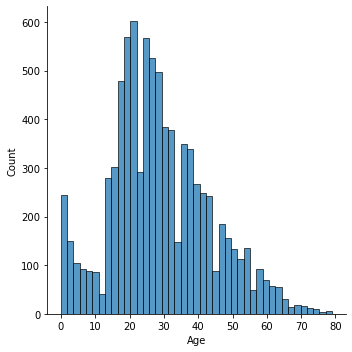

In [390]:
#Now we want to look at the age column.
sns.displot(X, x = 'Age')

In [391]:
X['Age'].mean()

28.82793046746535

In [392]:
#We fill missing values with 30, which is the mean rounded up.
X['Age'] = X['Age'].fillna(value = 30)

In [393]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8693 non-null   int64  
 3   Destination   8693 non-null   object 
 4   Age           8693 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Name          8493 non-null   object 
 12  Transported   8693 non-null   int64  
dtypes: float64(6), int64(2), object(5)
memory usage: 883.0+ KB


In [394]:
#We convert the vip comlumn to values in {0,1}.
# We have 0 = not VIP, and 1 = Is a VIP.
X['VIP'] = X['VIP'].apply(lambda x : 1 if x else 0)

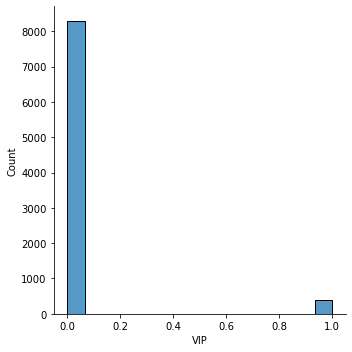

In [395]:
sns.displot(X,x = 'VIP')

In [396]:
#The majority of people were not VIPs, so we are going to fill missing values with the most common value.
X['VIP'] = X['VIP'].fillna(value = 0)

In [397]:
#We drop the name column.
X = X.drop('Name',axis = 1)

In [398]:
#We now begin analyzing the room service column.
X['RoomService'].describe()

count     8512.000000
mean       224.687617
std        666.717663
min          0.000000
25%          0.000000
50%          0.000000
75%         47.000000
max      14327.000000
Name: RoomService, dtype: float64

In [399]:
#Since we see that the majority of people either have no room service, and a few have above 47.

X['RoomService'][X['RoomService'] > 47].describe()

count     2124.000000
mean       895.088512
std       1087.536977
min         48.000000
25%        233.000000
50%        602.000000
75%       1102.250000
max      14327.000000
Name: RoomService, dtype: float64

(array([1.263e+03, 2.090e+02, 5.300e+01, 1.600e+01, 9.000e+00, 8.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([  252. ,  1659.5,  3067. ,  4474.5,  5882. ,  7289.5,  8697. ,
        10104.5, 11512. , 12919.5, 14327. ]),
 <BarContainer object of 10 artists>)

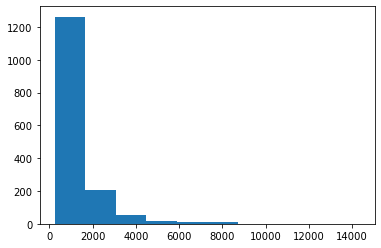

In [400]:
#Fro there we want to analyze the people with a lot of room service.
fig, ax = plt.subplots()
ax.hist(X['RoomService'][X['RoomService'] > 250])

In [401]:
X['RoomService'][X['RoomService'] > 250].mean()

1171.321153846154

In [402]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8693 non-null   int64  
 3   Destination   8693 non-null   object 
 4   Age           8693 non-null   float64
 5   VIP           8693 non-null   int64  
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Transported   8693 non-null   int64  
dtypes: float64(6), int64(3), object(3)
memory usage: 815.1+ KB


In [403]:
X['RoomService'].describe()

count     8512.000000
mean       224.687617
std        666.717663
min          0.000000
25%          0.000000
50%          0.000000
75%         47.000000
max      14327.000000
Name: RoomService, dtype: float64

In [404]:

X['RoomService'] = X['RoomService'].fillna(value = 0)

In [405]:
X['FoodCourt'].describe()

count     8510.000000
mean       458.077203
std       1611.489240
min          0.000000
25%          0.000000
50%          0.000000
75%         76.000000
max      29813.000000
Name: FoodCourt, dtype: float64

In [406]:
X['FoodCourt'] = X['FoodCourt'].fillna(value = 0)

In [407]:
X['ShoppingMall'].describe()

count     8485.000000
mean       173.729169
std        604.696458
min          0.000000
25%          0.000000
50%          0.000000
75%         27.000000
max      23492.000000
Name: ShoppingMall, dtype: float64

In [408]:
X['ShoppingMall'] = X['ShoppingMall'].fillna(value = 0)

In [409]:
X['Spa'].describe()

count     8510.000000
mean       311.138778
std       1136.705535
min          0.000000
25%          0.000000
50%          0.000000
75%         59.000000
max      22408.000000
Name: Spa, dtype: float64

In [410]:
X['Spa'] = X['Spa'].fillna(value = 0)

In [411]:
X['VRDeck'].describe()

count     8505.000000
mean       304.854791
std       1145.717189
min          0.000000
25%          0.000000
50%          0.000000
75%         46.000000
max      24133.000000
Name: VRDeck, dtype: float64

In [412]:
X['VRDeck'] = X['VRDeck'].fillna(value = 0)

(array([8.44e+03, 1.36e+02, 6.00e+01, 2.60e+01, 1.80e+01, 7.00e+00,
        2.00e+00, 2.00e+00, 1.00e+00, 1.00e+00]),
 array([    0. ,  2413.3,  4826.6,  7239.9,  9653.2, 12066.5, 14479.8,
        16893.1, 19306.4, 21719.7, 24133. ]),
 <BarContainer object of 10 artists>)

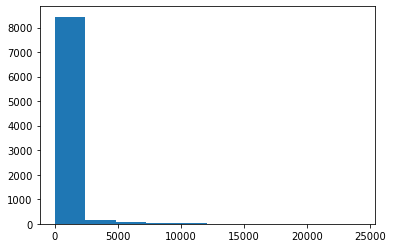

In [413]:
fig, ax = plt.subplots()
ax.hist(X['VRDeck'])

In [414]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8693 non-null   int64  
 3   Destination   8693 non-null   object 
 4   Age           8693 non-null   float64
 5   VIP           8693 non-null   int64  
 6   RoomService   8693 non-null   float64
 7   FoodCourt     8693 non-null   float64
 8   ShoppingMall  8693 non-null   float64
 9   Spa           8693 non-null   float64
 10  VRDeck        8693 non-null   float64
 11  Transported   8693 non-null   int64  
dtypes: float64(6), int64(3), object(3)
memory usage: 815.1+ KB


In [415]:
X.iloc[:, 6:11].describe()

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,220.009318,448.434027,169.572300,304.588865,298.261820
std,660.519050,1595.790627,598.007164,1125.562559,1134.126417
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,41.000000,61.000000,22.000000,53.000000,40.000000
max,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [416]:
def fun2(x):
    if x > 40:
        return 1
    return 0 

In [417]:
#We want to dvide the columns 6 though 11 into two classes.
for i in X.iloc[:,6:11].columns:
    print(type(i))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [418]:
#We want to dvide the columns 6 though 11 into two classes.
for i in X.iloc[:,6:11].columns: 
     X[i] = X[i].apply(fun2)

In [419]:
X['Age'].describe()

count    8693.000000
mean       28.852065
std        14.340021
min         0.000000
25%        20.000000
50%        27.000000
75%        37.000000
max        79.000000
Name: Age, dtype: float64

In [420]:
#We want to bring our ages into the interval [0,1].
#We don't want the distances in the age feature to give too much weight to age.
X['Age'] = X['Age']/X['Age'].max()

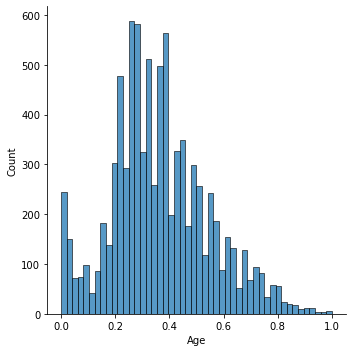

In [421]:
sns.displot(X,x = 'Age')

In [422]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8693 non-null   int64  
 3   Destination   8693 non-null   object 
 4   Age           8693 non-null   float64
 5   VIP           8693 non-null   int64  
 6   RoomService   8693 non-null   int64  
 7   FoodCourt     8693 non-null   int64  
 8   ShoppingMall  8693 non-null   int64  
 9   Spa           8693 non-null   int64  
 10  VRDeck        8693 non-null   int64  
 11  Transported   8693 non-null   int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 815.1+ KB


In [423]:
#We want to do one hot encoding for the binary classes.
X = pd.get_dummies(X, columns = ['HomePlanet','Destination',])

In [424]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PassengerId                8693 non-null   object 
 1   CryoSleep                  8693 non-null   int64  
 2   Age                        8693 non-null   float64
 3   VIP                        8693 non-null   int64  
 4   RoomService                8693 non-null   int64  
 5   FoodCourt                  8693 non-null   int64  
 6   ShoppingMall               8693 non-null   int64  
 7   Spa                        8693 non-null   int64  
 8   VRDeck                     8693 non-null   int64  
 9   Transported                8693 non-null   int64  
 10  HomePlanet_Earth           8693 non-null   uint8  
 11  HomePlanet_Europa          8693 non-null   uint8  
 12  HomePlanet_Mars            8693 non-null   uint8  
 13  Destination_55 Cancri e    8693 non-null   uint8

In [425]:
X.describe()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,0.374324,0.365216,0.046244,0.250201,0.262740,0.229035,0.260209,0.249051,0.503624,0.552514,0.245140,0.202347,0.207063,0.091568,0.701369
std,0.483976,0.181519,0.210025,0.433154,0.440148,0.420236,0.438774,0.432488,0.500016,0.497263,0.430195,0.401772,0.405224,0.288432,0.457684
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.253165,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.341772,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.468354,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [426]:
#We don't need passengerId.
X = X.drop('PassengerId',axis = 1)

In [427]:
#We are going to use a random forest classifier on our data.
from sklearn.ensemble import RandomForestClassifier 

In [428]:
#When training our Random Forest Classifier, we want to see how at each max depth hyper parameter affects our
# model on the training data and the validation data.
def my_rfc_hyp(a,b,T): #T is a tuple. T[0] = X_train, T[1] = y_train, T[2] = X_test, T[3] = X_train.
    A_train = []
    A_test = []
    B = []
    for i in range(a,b):
        
        rfc = RandomForestClassifier(max_depth = i, random_state = 1)
        rfc.fit(T[0],T[2])
        
        
        
        A_train.append(rfc.score(T[0],T[2]))
        
        
        A_test.append(rfc.score(T[1],T[3]))
        
        
    df = pd.DataFrame({
        'A_train': A_train,
        'A_test' : A_test,
        #'A_ratio': np.divide(A_test, A_train)
        
    
    })
    
    df.index = list(range(a,b))
    
    sns.lineplot(data = df)
    
    return None 
        
        
        
        
        

In [429]:
from sklearn.model_selection import train_test_split


In [430]:
#Selecting our target data.
y = X.iloc[: , 8]

In [431]:
#Getting rid of target data in our input data.
X = X.drop('Transported',axis = 1)

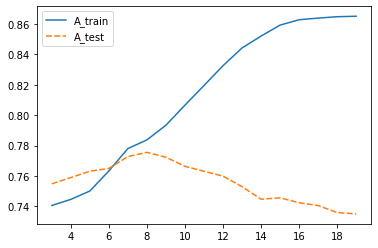

In [432]:
#Calling the previously defined function in order to view
# performance of model on training data and validation data.

my_rfc_hyp(3,20,train_test_split(X,y))

We see that the train score levels off with value 0.86,
and we see that around 8, the test score peaks around value 0.76.

This peak happens when our max_depth is 8,
so this the hyper parameter value we are going to use.



In [433]:
rfc = RandomForestClassifier(max_depth = 8,random_state = 1)

In [434]:
X_train,X_test, y_train, y_test = train_test_split(X,y)

In [435]:
#We fit our model using the discovered hyper parameter.
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=8, random_state=1)

To do: Clean test data and creat predictions. 

# Cleaning Test Data


In [436]:
#Now we have to apply our transformations to the test data in order to use the fitted model to make predictions.
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [437]:
test_data['CryoSleep'] = test_data['CryoSleep'].apply(lambda x : 1 if x else 0)

In [438]:
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,1,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,0,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,1,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,0,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,0,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [439]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4277 non-null   int64  
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), int64(1), object(6)
memory usage: 434.5+ KB


In [440]:
D = test_data

In [441]:
D['HomePlanet'] = D['HomePlanet'].fillna(value = 'Earth')
D['Destination'] = D['Destination'].fillna(value = 'TRAPPIST-1e')


In [442]:
D.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4277 non-null   object 
 2   CryoSleep     4277 non-null   int64  
 3   Cabin         4177 non-null   object 
 4   Destination   4277 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), int64(1), object(6)
memory usage: 434.5+ KB


In [443]:
D = D.drop('Cabin', axis = 1)

In [444]:
D.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4277 non-null   object 
 2   CryoSleep     4277 non-null   int64  
 3   Destination   4277 non-null   object 
 4   Age           4186 non-null   float64
 5   VIP           4184 non-null   object 
 6   RoomService   4195 non-null   float64
 7   FoodCourt     4171 non-null   float64
 8   ShoppingMall  4179 non-null   float64
 9   Spa           4176 non-null   float64
 10  VRDeck        4197 non-null   float64
 11  Name          4183 non-null   object 
dtypes: float64(6), int64(1), object(5)
memory usage: 401.1+ KB


In [445]:
D['Age'] = D['Age'].fillna(value = 0)

In [446]:
D.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4277 non-null   object 
 2   CryoSleep     4277 non-null   int64  
 3   Destination   4277 non-null   object 
 4   Age           4277 non-null   float64
 5   VIP           4184 non-null   object 
 6   RoomService   4195 non-null   float64
 7   FoodCourt     4171 non-null   float64
 8   ShoppingMall  4179 non-null   float64
 9   Spa           4176 non-null   float64
 10  VRDeck        4197 non-null   float64
 11  Name          4183 non-null   object 
dtypes: float64(6), int64(1), object(5)
memory usage: 401.1+ KB


In [447]:
D['VIP'] = D['VIP'].apply(lambda x : 1 if x else 0)

In [448]:
D.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4277 non-null   object 
 2   CryoSleep     4277 non-null   int64  
 3   Destination   4277 non-null   object 
 4   Age           4277 non-null   float64
 5   VIP           4277 non-null   int64  
 6   RoomService   4195 non-null   float64
 7   FoodCourt     4171 non-null   float64
 8   ShoppingMall  4179 non-null   float64
 9   Spa           4176 non-null   float64
 10  VRDeck        4197 non-null   float64
 11  Name          4183 non-null   object 
dtypes: float64(6), int64(2), object(4)
memory usage: 401.1+ KB


In [449]:
D = D.drop('Name',axis = 1)

In [450]:
D.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4277 non-null   object 
 2   CryoSleep     4277 non-null   int64  
 3   Destination   4277 non-null   object 
 4   Age           4277 non-null   float64
 5   VIP           4277 non-null   int64  
 6   RoomService   4195 non-null   float64
 7   FoodCourt     4171 non-null   float64
 8   ShoppingMall  4179 non-null   float64
 9   Spa           4176 non-null   float64
 10  VRDeck        4197 non-null   float64
dtypes: float64(6), int64(2), object(3)
memory usage: 367.7+ KB


In [451]:
D.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4277 non-null   object 
 2   CryoSleep     4277 non-null   int64  
 3   Destination   4277 non-null   object 
 4   Age           4277 non-null   float64
 5   VIP           4277 non-null   int64  
 6   RoomService   4195 non-null   float64
 7   FoodCourt     4171 non-null   float64
 8   ShoppingMall  4179 non-null   float64
 9   Spa           4176 non-null   float64
 10  VRDeck        4197 non-null   float64
dtypes: float64(6), int64(2), object(3)
memory usage: 367.7+ KB


In [452]:
D.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'],
      dtype='object')

In [453]:
D[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = D[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna( value = 0)

In [454]:
for  i in ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']:
    D[i] = D[i].apply(fun2)

In [455]:
D.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4277 non-null   object 
 2   CryoSleep     4277 non-null   int64  
 3   Destination   4277 non-null   object 
 4   Age           4277 non-null   float64
 5   VIP           4277 non-null   int64  
 6   RoomService   4277 non-null   int64  
 7   FoodCourt     4277 non-null   int64  
 8   ShoppingMall  4277 non-null   int64  
 9   Spa           4277 non-null   int64  
 10  VRDeck        4277 non-null   int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 367.7+ KB


In [456]:
D['Age'] = D['Age']/D['Age'].max()

In [457]:
D = pd.get_dummies(D,columns = ['HomePlanet', 'Destination'])

In [458]:
D.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PassengerId                4277 non-null   object 
 1   CryoSleep                  4277 non-null   int64  
 2   Age                        4277 non-null   float64
 3   VIP                        4277 non-null   int64  
 4   RoomService                4277 non-null   int64  
 5   FoodCourt                  4277 non-null   int64  
 6   ShoppingMall               4277 non-null   int64  
 7   Spa                        4277 non-null   int64  
 8   VRDeck                     4277 non-null   int64  
 9   HomePlanet_Earth           4277 non-null   uint8  
 10  HomePlanet_Europa          4277 non-null   uint8  
 11  HomePlanet_Mars            4277 non-null   uint8  
 12  Destination_55 Cancri e    4277 non-null   uint8  
 13  Destination_PSO J318.5-22  4277 non-null   uint8

In [459]:
D.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PassengerId                4277 non-null   object 
 1   CryoSleep                  4277 non-null   int64  
 2   Age                        4277 non-null   float64
 3   VIP                        4277 non-null   int64  
 4   RoomService                4277 non-null   int64  
 5   FoodCourt                  4277 non-null   int64  
 6   ShoppingMall               4277 non-null   int64  
 7   Spa                        4277 non-null   int64  
 8   VRDeck                     4277 non-null   int64  
 9   HomePlanet_Earth           4277 non-null   uint8  
 10  HomePlanet_Europa          4277 non-null   uint8  
 11  HomePlanet_Mars            4277 non-null   uint8  
 12  Destination_55 Cancri e    4277 non-null   uint8  
 13  Destination_PSO J318.5-22  4277 non-null   uint8

In [460]:
#Collecting the passengerId to use later.
P_Id = test_data['PassengerId']

In [461]:
#Dropping our PassengerId  from data we are going to predict on.
D = D.drop('PassengerId',axis = 1)

# Make predictions on test data

In [462]:
predictions = pd.Series(rfc.predict(D))

In [463]:
#function for relabelling our prediction to boolean values.
def fun3(x):
    if x == 1:
        return True
    return False

In [464]:
predictions = predictions.apply(fun3)

In [465]:
len(predictions)

4277

In [466]:
P_Id.tail()

4272    9266_02
4273    9269_01
4274    9271_01
4275    9273_01
4276    9277_01
Name: PassengerId, dtype: object

In [467]:
#Creating our submission.
output =pd.DataFrame(
{ 'PassengerId' : P_Id ,
 'Transported' : predictions
    
})

In [468]:
output.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,False
4,0023_01,True


In [469]:
output

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,False
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [470]:
#Creating our submission.
output.to_csv('Submission/SpaceTitanic_ProjectSubmission.csv', index = False )